Number of clusters: 4
DB Index: 1.1096914505444435
Silhouette Score: 0.39044866239660064
Inertia: 1977.903850339785


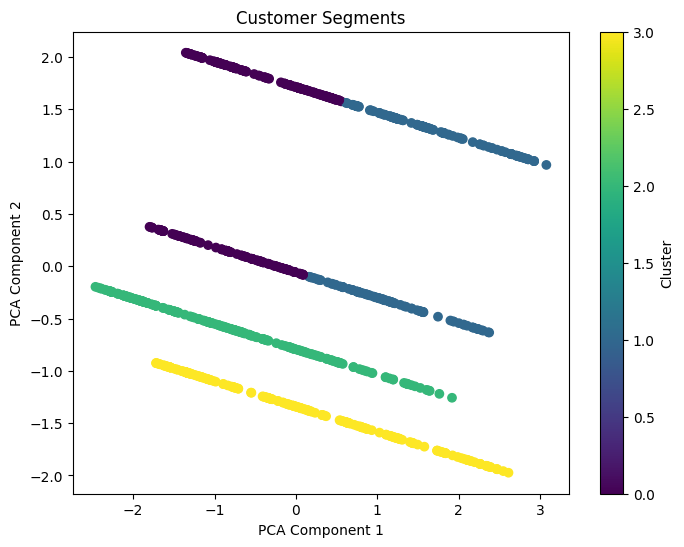

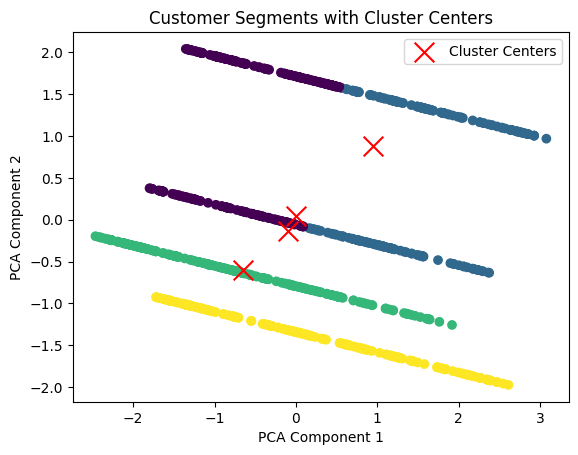

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Clean column names (remove extra spaces)
customers_df.columns = customers_df.columns.str.strip()
transactions_df.columns = transactions_df.columns.str.strip()

# Merging customer and transaction data on 'CustomerID'
data = pd.merge(customers_df, transactions_df, on='CustomerID')

# Handle missing data (example: drop rows with missing values)
data = data.dropna()

# Extract features (adjust according to your dataset)
# Example: 'CustomerID', 'Region', 'Quantity', 'TotalValue' are placeholders
features = data[['Region', 'Quantity', 'TotalValue']]  # Adjust according to your dataset

# Convert categorical data (e.g., 'Region') into numerical format using one-hot encoding
features = pd.get_dummies(features, drop_first=True)

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering (choose number of clusters, e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Clustering metrics
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)
inertia = kmeans.inertia_

# Print clustering results
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {inertia}")

# Visualize the clusters using PCA for 2D projection
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Visualize the cluster centers (for K-Means)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('Customer Segments with Cluster Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [3]:
# Check the column names of both dataframes
print("Customers DataFrame Columns:", customers_df.columns)
print("Transactions DataFrame Columns:", transactions_df.columns)


Customers DataFrame Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions DataFrame Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
